In [1]:
import numpy as np
import gym
from hiive.mdptoolbox import example, mdp
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import gc
import tools

# set seed
np.random.seed(0)

In [80]:
TERM_STATE_MAP = {"4x4": [5, 7, 11, 12], "8x8": [19, 29, 35, 41, 42, 46, 49, 52, 54, 59], "50x50":[]}
GOAL_STATE_MAP = {"4x4": [15], "8x8": [63], "50x50":[2499]}
cmap = 'coolwarm'
def visualize_env(env, name, title='Frozen Lake Grid Space (4x4)', save_title = 'Frozen Lake Grid Space (4x4)'):
    shape = env.desc.shape
    M = shape[0]
    N = shape[1]
    arr = np.zeros(shape)
    for i in range(M):
        for j in range(N):
            if i == 0 and j == 0:
                arr[i, j] = 0.0
            elif (N * i + j) in TERM_STATE_MAP[name]:
                arr[i, j] = 0.25
            elif (N * i + j) in GOAL_STATE_MAP[name]:
                arr[i, j] = 1.0
            else:
                arr[i, j] = 0.5
    fig, ax = plt.subplots(figsize=(6,6))
    im = ax.imshow(arr, cmap=cmap, alpha=0.7)
    ax.set_xticks(np.arange(M))
    ax.set_yticks(np.arange(N))
    ax.set_xticklabels(np.arange(M))
    ax.set_yticklabels(np.arange(N))
    ax.set_xticks(np.arange(-0.5, M, 1), minor=True)
    ax.set_yticks(np.arange(-0.5, N, 1), minor=True)
    ax.grid(False)
    ax.grid(which='minor', color='w', linewidth=2, linestyle='-')
    ax.set_aspect('equal')

    for i in range(M):
        for j in range(N):
            if (i, j) == (0, 0):
                ax.text(j, i, 'S', ha='center', va='center', color='k', size=18)
            elif (N * i + j) in TERM_STATE_MAP[name]:
                ax.text(j, i, 'H', ha='center', va='center', color='k', size=18)
            elif (N * i + j) in GOAL_STATE_MAP[name]:
                ax.text(j, i, 'G', ha='center', va='center', color='k', size=18)
            else:
                ax.text(j, i, 'F', ha='center', va='center', color='k', size=18)
    ax.tick_params(axis='both', which='major', length=0)
    ax.set_title(title, fontsize=24, pad=10)
    plt.show()
    fig.savefig('C:/Users/sagni/Documents/Personal Files/CS7641/Assignment4/Images/Frozen_lake/' + save_title + '.png', dpi=600)
    gc.collect()

def visualize_policy(policy, shape, name, title='Frozen Lake Grid Space (4x4)', save_title = 'Frozen Lake Grid Space (4x4)'):
    M = shape[0]
    N = shape[1]
    actions = np.asarray(policy).reshape(shape)
#     mapping = {
#         0: '←',
#         1: '↓',
#         2: '→',
#         3: '↑'
#     }
    mapping = {
        0: '↓',
        1: '→',
        2: '↑',
        3: '←'
    }
    arr = np.zeros(shape)
    for i in range(M):
        for j in range(N):
            if i == 0 and j == 0:
                arr[i, j] = 0.0
            elif (N * i + j) in TERM_STATE_MAP[name]:
                arr[i, j] = 0.25
            elif (N * i + j) in GOAL_STATE_MAP[name]:
                arr[i, j] = 1.0
            else:
                arr[i, j] = 0.5
    fig, ax = plt.subplots(figsize=(6,6))
    im = ax.imshow(arr, cmap=cmap, alpha=0.7)
    ax.set_xticks(np.arange(M))
    ax.set_yticks(np.arange(N))
    ax.set_xticklabels(np.arange(M))
    ax.set_yticklabels(np.arange(N))
    ax.set_xticks(np.arange(-0.5, M, 1), minor=True)
    ax.set_yticks(np.arange(-0.5, N, 1), minor=True)
    ax.grid(False)
    ax.grid(which='minor', color='w', linewidth=2, linestyle='-')
    ax.set_aspect('equal')

    for i in range(M):
        for j in range(N):
            if (N * i + j) in TERM_STATE_MAP[name]:
                ax.text(j, i, 'H', ha='center', va='center', color='k', size=18)
            elif (N * i + j) in GOAL_STATE_MAP[name]:
                ax.text(j, i, 'G', ha='center', va='center', color='k', size=18)
            else:
                ax.text(j, i, mapping[actions[i, j]], ha='center', va='center', color='k', size=18)
    ax.tick_params(axis='both', which='major', length=0)
    ax.set_title(title, fontsize=24, pad=10)
    plt.show()
    fig.savefig('C:/Users/sagni/Documents/Personal Files/CS7641/Assignment4/Images/Frozen_lake/' + save_title + '.png', dpi=600)
    gc.collect()

def visualize_value(V, shape, name, title='Frozen Lake Grid Space (4x4)', save_title = 'Frozen Lake Grid Space (4x4)'):
    V = np.asarray(V)
    M = shape[0]
    N = shape[1]
    fig, ax = plt.subplots(figsize=(6,6))
    arr = V.reshape(shape)
    im = ax.imshow(arr, cmap=cmap, alpha=0.7)
    ax.set_xticks(np.arange(M))
    ax.set_yticks(np.arange(N))
    ax.set_xticklabels(np.arange(M))
    ax.set_yticklabels(np.arange(N))
    ax.set_xticks(np.arange(-0.5, M, 1), minor=True)
    ax.set_yticks(np.arange(-0.5, N, 1), minor=True)
    ax.grid(False)
    ax.grid(which='minor', color='w', linewidth=2, linestyle='-')
    ax.set_aspect('equal')
    for i in range(M):
        for j in range(N):
            if (N * i + j) in TERM_STATE_MAP[name]:
                ax.text(j, i, 'H', ha='center', va='center', color='k')
            elif (N * i + j) in GOAL_STATE_MAP[name]:
                ax.text(j, i, 'G', ha='center', va='center', color='k')
            else:
                ax.text(j, i, '%.2f' % (arr[i, j]), ha='center', va='center', color='k')
    # fig.tight_layout()
    cbar = ax.figure.colorbar(im, ax=ax)
    cbar.ax.set_ylabel('State-value estimate', rotation=90, va="bottom")
    ax.tick_params(axis='both', which='major', length=0)
    ax.set_title(title, fontsize=24, pad=10)
    plt.show()
    fig.savefig('C:/Users/sagni/Documents/Personal Files/CS7641/Assignment4/Images/Frozen_lake/' + save_title + '.png', dpi=600)
    gc.collect()
    
def getRewardProb(env, sz):
    sz = int(sz**2)
    r = np.zeros((4,sz,sz))
    p = np.zeros((4,sz,sz))
    envP = env.unwrapped.P
    for state in envP:
        for action in envP[state]:
            transitions = envP[state][action]
            for t_idx in range((len(transitions))):
                new_state = transitions[t_idx][1]
                trans_prob = transitions[t_idx][0]
                reward = transitions[t_idx][2]
                p[action][state][new_state] += trans_prob
                r[action][state][new_state] += reward
            p[action,state,:] /= np.sum(p[action,state,:])
    return r, p


In [57]:
r, p = getRewardProb(env, s)


### Setup

C:\Users\sagni\anaconda3\envs\Python_3_10_11\lib\site-packages\gym\envs\toy_text\frozen_lake.py:271: UserWarning: WARN: You are calling render method without specifying any render mode. You can specify the render_mode at initialization, e.g. gym("FrozenLake-v1", render_mode="rgb_array")
  logger.warn(


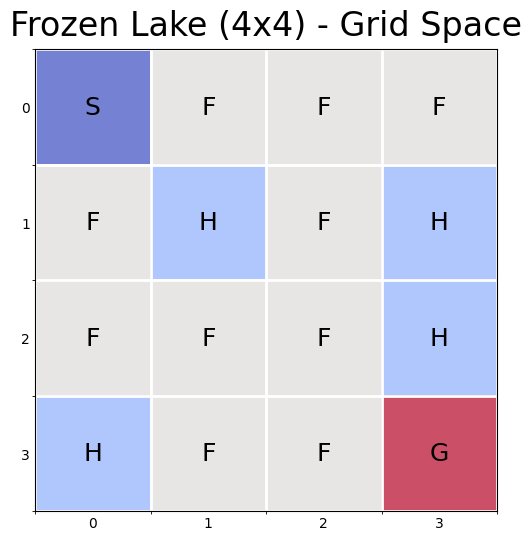

In [92]:
s = 4

opt = "{}x{}".format(s,s)
sz = (s,s)
env = gym.make("FrozenLake-v1", desc=None, is_slippery=True, map_name=opt)
env.reset()
env.render()
visualize_env(env, opt, title='Frozen Lake (4x4) - Grid Space', save_title = 'FL4x4_GridSpace')
# r, p = getRewardProb(env, s)
# vi = mdp.ValueIteration(p, r, 0.9, max_iter=10000)
# vi.run()
# visualize_policy(vi.policy, sz, opt, title='Frozen Lake (4x4) - Policy', save_title = 'FL4x4_GridSpace_Policy')

# VI

In [192]:
# Error is defined at line 1180 of:
# https://github.com/hiive/hiivemdptoolbox/blob/master/hiive/mdptoolbox/mdp.py
# It's the change in Q, AKA dQ
def valueIterateGraph(p, r, value_iterate=True, name = 'Frozen Lake (4x4)', name2 = 'FL4x4'):
    header = 24
    other_title = 18
    max_vs = []
    mean_vs = []
    errors = []
    rewards = []
    iterations = []
    time = []
    gammas = list(np.arange(0.55,1,0.1))
    for gamma in gammas:
        if value_iterate:
            print('vi')
            vi = mdp.ValueIteration(p, r, gamma, max_iter=1000)
        else:
            print('pi')
            vi = mdp.PolicyIteration(p, r, gamma, max_iter=1000)
        vi.run()
        vi.run_stats
        iterations.append(list(range(1,len(vi.run_stats)+1)))
        max_vs.append([el['Max V'] for el in vi.run_stats])
        mean_vs.append([el['Mean V'] for el in vi.run_stats])
        errors.append([el['Error'] for el in vi.run_stats])
        rewards.append([el['Reward'] for el in vi.run_stats])
        time.append([el['Time'] for el in vi.run_stats])

    time_values_list = [max(sublist) for sublist in time]
    plt.clf()
    plt.figure(figsize=(12, 8))
    plt.gcf().set_facecolor('white')
    fig, ax = plt.subplots(figsize=(12, 8))
    fig.set_facecolor('white')
    ax.set_facecolor('white')
    plt.bar(gammas, time_values_list, color ='darkblue', width = 0.05, alpha = 0.9)
    plt.xticks(gammas)
    if value_iterate:
        plt.title(name + ' - Execution Time\nVarying Gamma (VI)', fontsize=header)
    else:
        plt.title(name + ' - Execution Time\nVarying Gamma (PI)', fontsize=header)
    plt.xlabel('Gamma', fontsize=other_title)
    plt.ylabel('Wall Clock Time', fontsize=other_title)
    plt.tick_params(direction='in', bottom=True, top=True, left=True, right=True, length=4)
    plt.gca().spines['top'].set_color('black')
    plt.gca().spines['bottom'].set_color('black')
    plt.gca().spines['left'].set_color('black')
    plt.gca().spines['right'].set_color('black')
    spine_alpha = 0.5
    plt.gca().spines['top'].set_alpha(spine_alpha)
    plt.gca().spines['bottom'].set_alpha(spine_alpha)
    plt.gca().spines['left'].set_alpha(spine_alpha)
    plt.gca().spines['right'].set_alpha(spine_alpha)
    plt.grid(True, linestyle="dotted", alpha=0.45, color='black')
    plt.xticks(fontsize=other_title)
    plt.yticks(fontsize=other_title)
    if value_iterate:
        plt.savefig('C:/Users/sagni/Documents/Personal Files/CS7641/Assignment4/Images/Frozen_lake/VI_' + name2 + '_Time.png', dpi=600)
    else:
        plt.savefig('C:/Users/sagni/Documents/Personal Files/CS7641/Assignment4/Images/Frozen_lake/PI_' + name2 + '_Time.png', dpi=600)
    plt.show()
    
    plt.clf()
    plt.figure(figsize=(12, 8))
    plt.gcf().set_facecolor('white')
    fig, ax = plt.subplots(figsize=(12, 8))
    fig.set_facecolor('white')
    ax.set_facecolor('white')
    for i in range(len(max_vs)):
        plt.plot(iterations[i], max_vs[i], alpha=1, label="Gamma: {}".format(np.round(gammas[i],3)))
    plt.legend(loc='lower right', frameon=True, edgecolor='black', facecolor='white', fontsize=other_title)
    if value_iterate:
        plt.title(name + ' - Max Value Over Iterations\nVarying Gamma (VI)', fontsize=header)
    else:
        plt.title(name + ' - Max Value Over Iterations\nVarying Gamma (PI)', fontsize=header)
    plt.xlabel('Iterations', fontsize=other_title)
    plt.ylabel('MaxV', fontsize=other_title)
    plt.tick_params(direction='in', bottom=True, top=True, left=True, right=True, length=4)
    plt.gca().spines['top'].set_color('black')
    plt.gca().spines['bottom'].set_color('black')
    plt.gca().spines['left'].set_color('black')
    plt.gca().spines['right'].set_color('black')
    spine_alpha = 0.5
    plt.gca().spines['top'].set_alpha(spine_alpha)
    plt.gca().spines['bottom'].set_alpha(spine_alpha)
    plt.gca().spines['left'].set_alpha(spine_alpha)
    plt.gca().spines['right'].set_alpha(spine_alpha)
    plt.grid(True, linestyle="dotted", alpha=0.45, color='black')
    plt.xticks(fontsize=other_title)
    plt.yticks(fontsize=other_title)
    if value_iterate:
        plt.savefig('C:/Users/sagni/Documents/Personal Files/CS7641/Assignment4/Images/Frozen_lake/VI_' + name2 + '_MaxV.png', dpi=600)
    else:
        plt.savefig('C:/Users/sagni/Documents/Personal Files/CS7641/Assignment4/Images/Frozen_lake/PI_' + name2 + '_MaxV.png', dpi=600)
    plt.show()
    
    plt.clf()
    plt.figure(figsize=(12, 8))
    plt.gcf().set_facecolor('white')
    fig, ax = plt.subplots(figsize=(12, 8))
    fig.set_facecolor('white')
    ax.set_facecolor('white')
    for i in range(len(mean_vs)):
         plt.plot(iterations[i], mean_vs[i], alpha=1, label="Gamma: {}".format(np.round(gammas[i],3)))
    plt.legend(loc='lower right', frameon=True, edgecolor='black', facecolor='white', fontsize=other_title)
    if value_iterate:
        plt.title(name + ' - Mean Value Over Iterations\nVarying Gamma (VI)', fontsize=header)
    else:
        plt.title(name + ' - Mean Value Over Iterations\nVarying Gamma (PI)', fontsize=header)
    plt.xlabel('Iterations', fontsize=other_title)
    plt.ylabel('MeanV', fontsize=other_title)
    plt.tick_params(direction='in', bottom=True, top=True, left=True, right=True, length=4)
    plt.gca().spines['top'].set_color('black')
    plt.gca().spines['bottom'].set_color('black')
    plt.gca().spines['left'].set_color('black')
    plt.gca().spines['right'].set_color('black')
    spine_alpha = 0.5
    plt.gca().spines['top'].set_alpha(spine_alpha)
    plt.gca().spines['bottom'].set_alpha(spine_alpha)
    plt.gca().spines['left'].set_alpha(spine_alpha)
    plt.gca().spines['right'].set_alpha(spine_alpha)
    plt.grid(True, linestyle="dotted", alpha=0.45, color='black')
    plt.xticks(fontsize=other_title)
    plt.yticks(fontsize=other_title)
    if value_iterate:
        plt.savefig('C:/Users/sagni/Documents/Personal Files/CS7641/Assignment4/Images/Frozen_lake/VI_' + name2 + '_MeanV.png', dpi=600)
    else:
        plt.savefig('C:/Users/sagni/Documents/Personal Files/CS7641/Assignment4/Images/Frozen_lake/PI_' + name2 + '_MeanV.png', dpi=600)
    plt.show()

    plt.clf()
    plt.figure(figsize=(12, 8))
    plt.gcf().set_facecolor('white')
    fig, ax = plt.subplots(figsize=(12, 8))
    fig.set_facecolor('white')
    ax.set_facecolor('white')
    for i in range(len(mean_vs)):
         plt.plot(iterations[i], errors[i], alpha=1, label="Gamma: {}".format(np.round(gammas[i],3)))
    plt.legend(loc='lower right', frameon=True, edgecolor='black', facecolor='white', fontsize=other_title)
    if value_iterate:
        plt.title(name + ' - Error Over Iterations\nVarying Gamma (VI)', fontsize=header)
    else:
        plt.title(name + ' - Error Over Iterations\nVarying Gamma (PI)', fontsize=header)
    plt.xlabel('Iterations', fontsize=other_title)
    plt.ylabel('Error', fontsize=other_title)
    plt.tick_params(direction='in', bottom=True, top=True, left=True, right=True, length=4)
    plt.gca().spines['top'].set_color('black')
    plt.gca().spines['bottom'].set_color('black')
    plt.gca().spines['left'].set_color('black')
    plt.gca().spines['right'].set_color('black')
    spine_alpha = 0.5
    plt.gca().spines['top'].set_alpha(spine_alpha)
    plt.gca().spines['bottom'].set_alpha(spine_alpha)
    plt.gca().spines['left'].set_alpha(spine_alpha)
    plt.gca().spines['right'].set_alpha(spine_alpha)
    plt.grid(True, linestyle="dotted", alpha=0.45, color='black')
    plt.xticks(fontsize=other_title)
    plt.yticks(fontsize=other_title)
    if value_iterate:
        plt.savefig('C:/Users/sagni/Documents/Personal Files/CS7641/Assignment4/Images/Frozen_lake/VI_' + name2 + '_Error.png', dpi=600)
    else:
        plt.savefig('C:/Users/sagni/Documents/Personal Files/CS7641/Assignment4/Images/Frozen_lake/PI_' + name2 + '_Error.png', dpi=600)
    plt.show()

    plt.clf()
    plt.figure(figsize=(12, 8))
    plt.gcf().set_facecolor('white')
    fig, ax = plt.subplots(figsize=(12, 8))
    fig.set_facecolor('white')
    ax.set_facecolor('white')
    for i in range(len(mean_vs)):
         plt.plot(iterations[i], rewards[i], alpha=1, label="Gamma: {}".format(np.round(gammas[i],3)))
    plt.legend(loc='lower right', frameon=True, edgecolor='black', facecolor='white', fontsize=other_title)
    if value_iterate:
        plt.title(name + ' - Reward Over Iterations\nVarying Gamma (VI)', fontsize=header)
    else:
        plt.title(name + ' - Reward Over Iterations\nVarying Gamma (PI)', fontsize=header)
    plt.xlabel('Iterations', fontsize=other_title)
    plt.ylabel('Reward', fontsize=other_title)
    plt.tick_params(direction='in', bottom=True, top=True, left=True, right=True, length=4)
    plt.gca().spines['top'].set_color('black')
    plt.gca().spines['bottom'].set_color('black')
    plt.gca().spines['left'].set_color('black')
    plt.gca().spines['right'].set_color('black')
    spine_alpha = 0.5
    plt.gca().spines['top'].set_alpha(spine_alpha)
    plt.gca().spines['bottom'].set_alpha(spine_alpha)
    plt.gca().spines['left'].set_alpha(spine_alpha)
    plt.gca().spines['right'].set_alpha(spine_alpha)
    plt.grid(True, linestyle="dotted", alpha=0.45, color='black')
    plt.xticks(fontsize=other_title)
    plt.yticks(fontsize=other_title)
    if value_iterate:
        plt.savefig('C:/Users/sagni/Documents/Personal Files/CS7641/Assignment4/Images/Frozen_lake/VI_' + name2 + '_Reward.png', dpi=600)
    else:
        plt.savefig('C:/Users/sagni/Documents/Personal Files/CS7641/Assignment4/Images/Frozen_lake/PI_' + name2 + '_Reward.png', dpi=600)
    plt.show()
    
    gc.collect()

vi
vi
vi
vi
vi


<Figure size 640x480 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

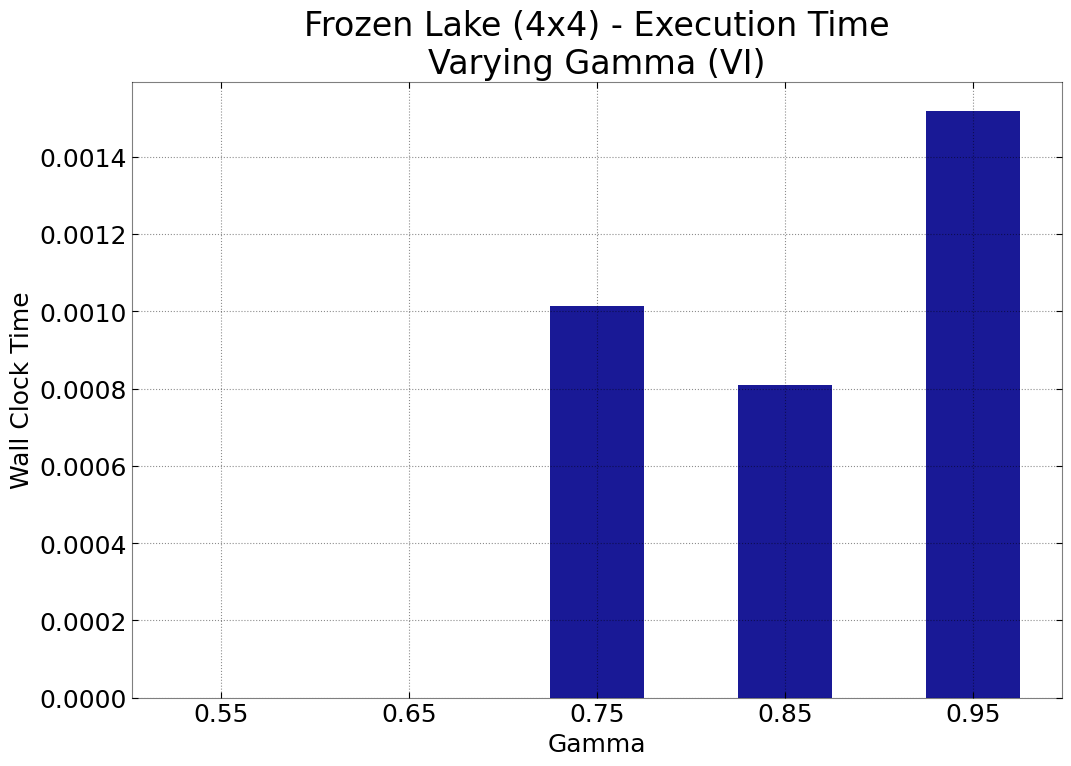

<Figure size 640x480 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

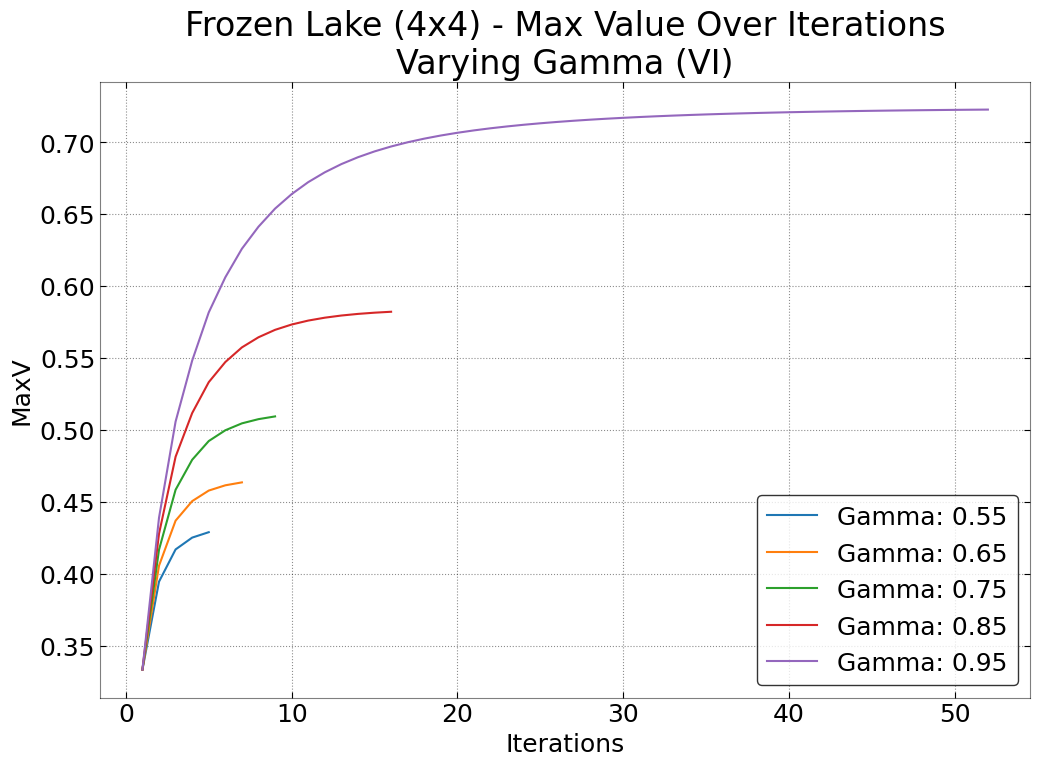

<Figure size 640x480 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

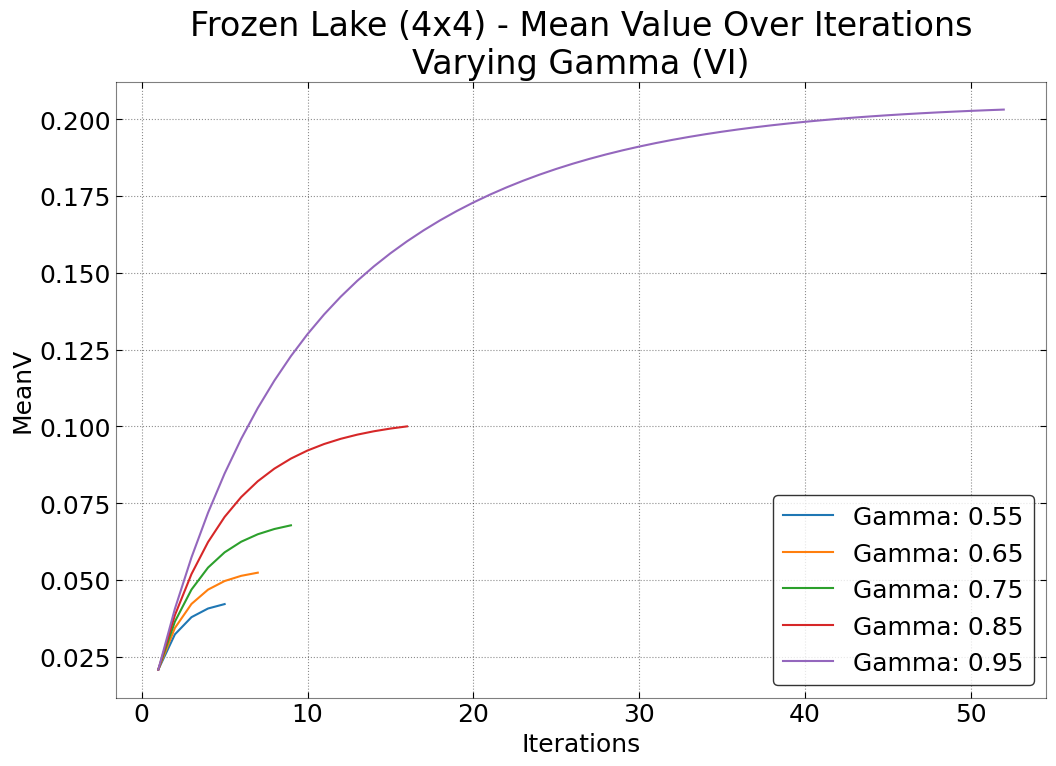

<Figure size 640x480 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

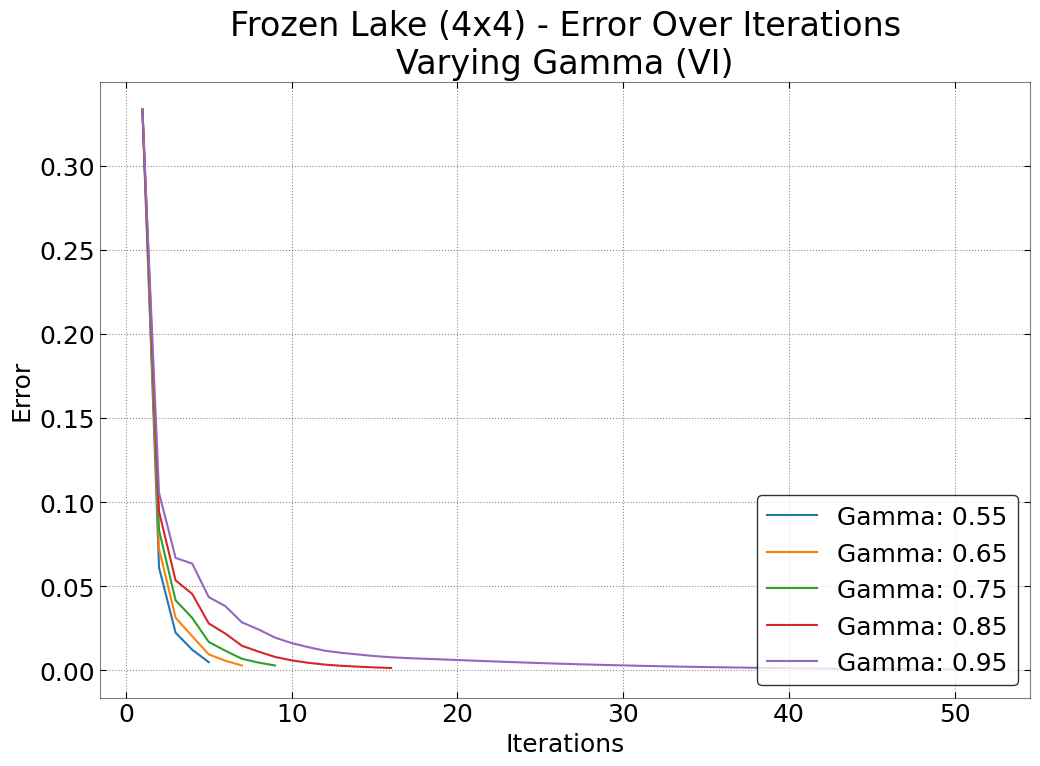

<Figure size 640x480 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

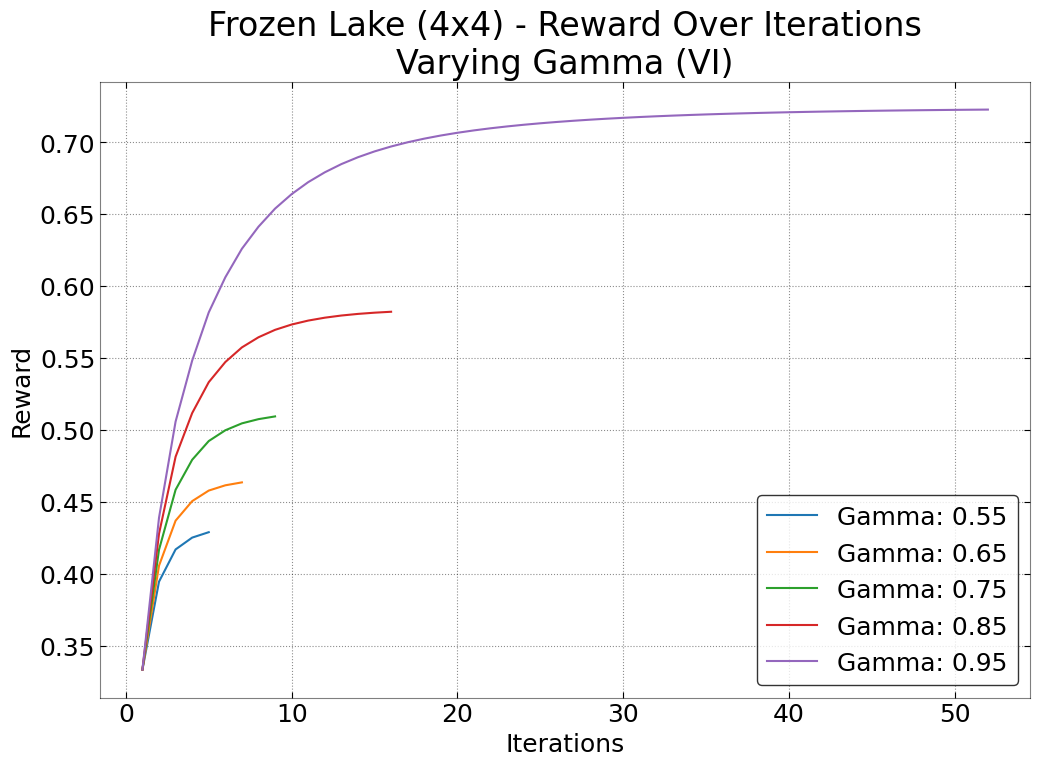

In [193]:
from time import time
s = 4
opt = "{}x{}".format(s,s)
sz = (s,s)
tic = time()
env = gym.make("FrozenLake-v1", desc=None, is_slippery=True, map_name=opt)
r, p = getRewardProb(env,s)
valueIterateGraph(p, r, value_iterate = True)

pi
pi
pi
pi
pi


<Figure size 640x480 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

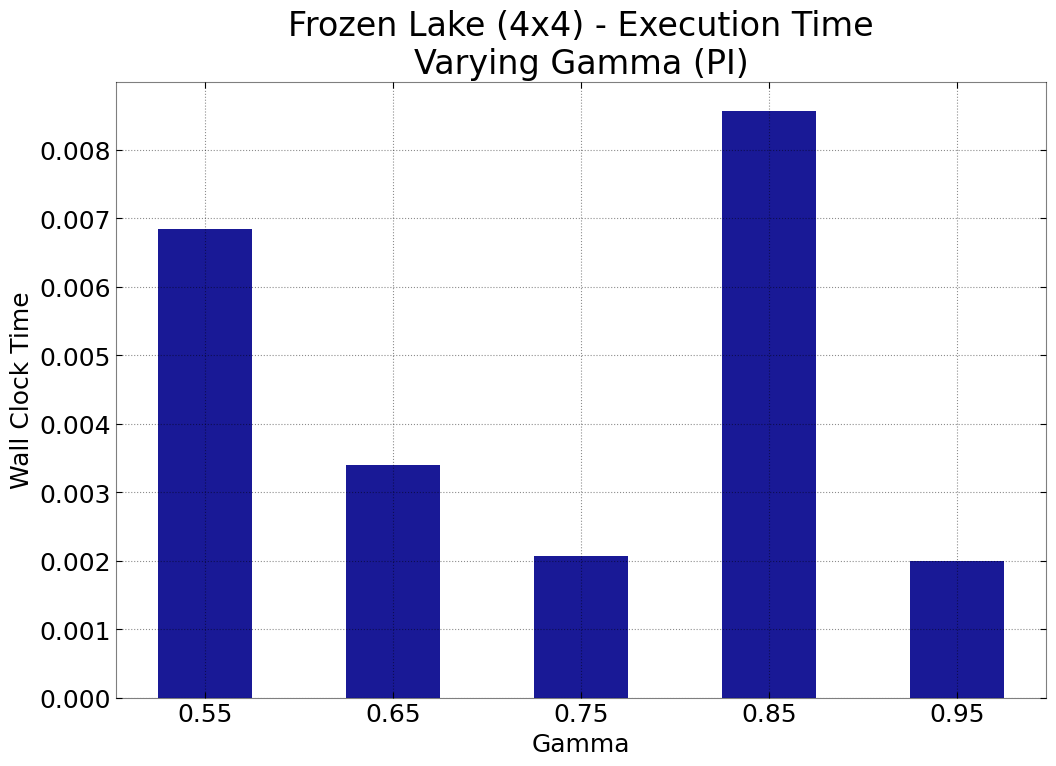

<Figure size 640x480 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

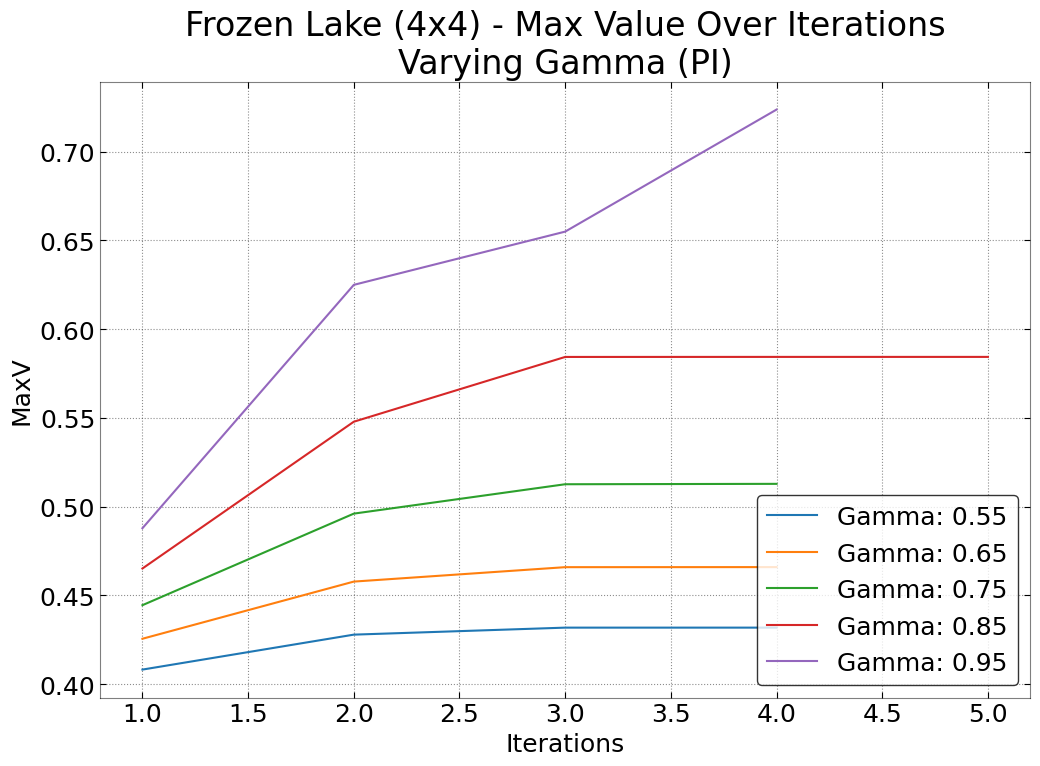

<Figure size 640x480 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

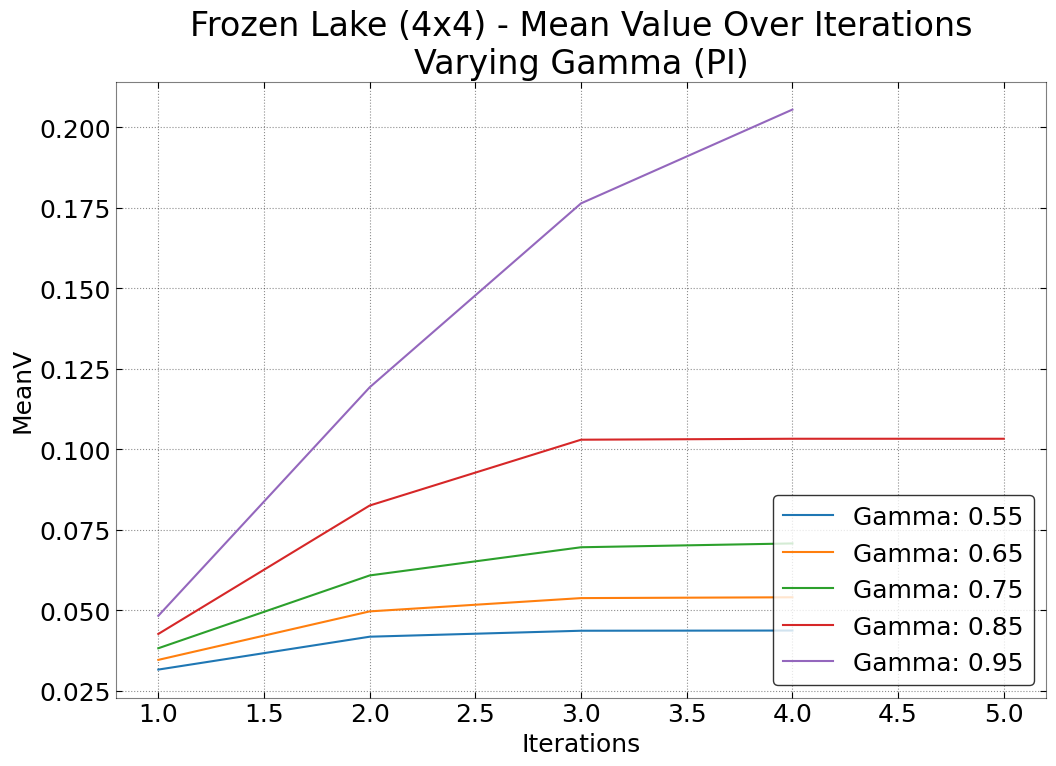

<Figure size 640x480 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

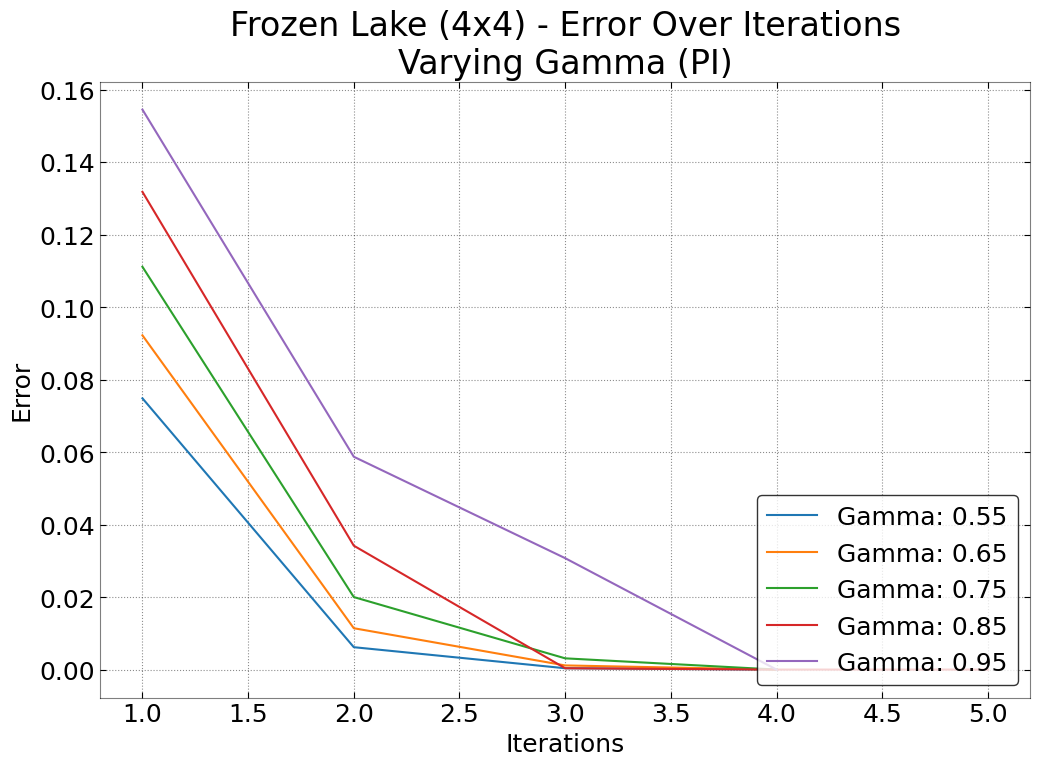

<Figure size 640x480 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

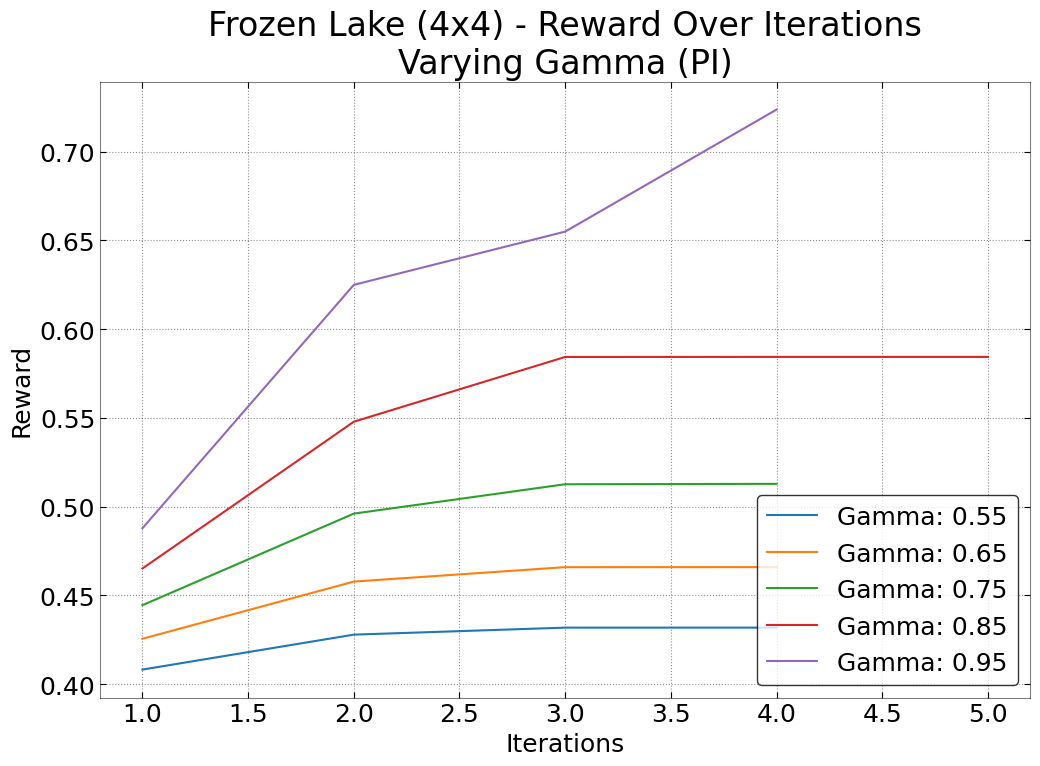

In [194]:
from time import time
s = 4
opt = "{}x{}".format(s,s)
sz = (s,s)
tic = time()
env = gym.make("FrozenLake-v1", desc=None, is_slippery=True, map_name=opt)
r, p = getRewardProb(env,s)
valueIterateGraph(p, r, value_iterate = False)